In [1]:
import pandas as pd
import glob

In [7]:
all_files = glob.glob('../data/NREL/*.csv')
all_files
df = pd.concat((pd.read_csv(f, skiprows = 2) for f in all_files), ignore_index=True)

In [10]:
df['Time'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])

In [12]:
df = df.set_index('Time')

In [19]:
df = df.drop(columns = ['Year', 'Month', 'Day', 'Hour', 'Minute'])

In [22]:
df.min()
df.max()

Wind Speed    6.3
dtype: float64

array([[<AxesSubplot:title={'center':'Wind Speed'}>]], dtype=object)

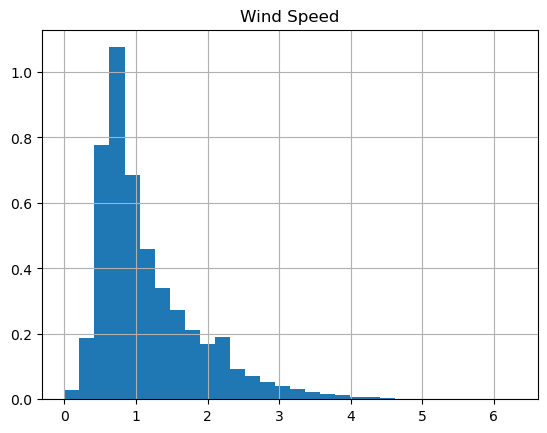

In [30]:
df.hist(bins = 30, density = True)

In [27]:
import numpy as np
np.linspace(-0.5,6.5,8)

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5])

In [39]:
def weibull_PDF(u,k,c):
    pdf = k/c*(u/c)**(k-1)*np.exp(-(u/c)**k)
    return pdf 

In [40]:
u_hat  = np.linspace(0,6.5,100)

C:\Users\gerkentx\AppData\Local\Temp\ipykernel_32736\2079943113.py:2: RuntimeWarning: divide by zero encountered in power
  pdf = k/c*(u/c)**(k-1)*np.exp(-(u/c)**k)


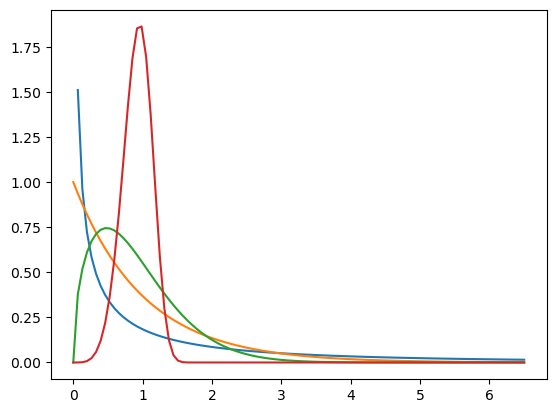

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure 

klist = [0.5, 1, 1.5, 5]

for k in klist: 
    pdf = weibull_PDF(u_hat,k,1)
    plt.plot(u_hat,pdf)

<Figure size 640x480 with 0 Axes>

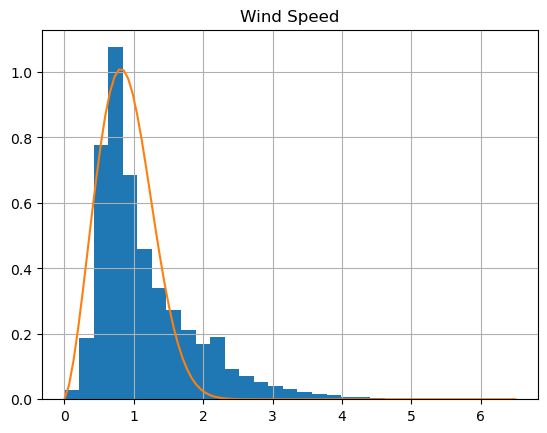

In [66]:
k = 2.5
c =1
plt.figure()
ax = df.hist(bins = 30, density = True)
plt.plot(u_hat,weibull_PDF(u_hat,k,c))

In [74]:
count, division = np.histogram(df['Wind Speed'], bins = 30, density = True)
count
np.delta(division)

AttributeError: module 'numpy' has no attribute 'delta'

In [78]:
(division[:-1]+division[1:])/2

array([0.105, 0.315, 0.525, 0.735, 0.945, 1.155, 1.365, 1.575, 1.785,
       1.995, 2.205, 2.415, 2.625, 2.835, 3.045, 3.255, 3.465, 3.675,
       3.885, 4.095, 4.305, 4.515, 4.725, 4.935, 5.145, 5.355, 5.565,
       5.775, 5.985, 6.195])

In [79]:
from scipy.optimize import curve_fit
u=(division[:-1]+division[1:])/2
curve_fit(weibull_PDF, u ,count)


(array([2.15610782, 1.05585435]),
 array([[ 0.02035924, -0.00024653],
        [-0.00024653,  0.00183204]]))

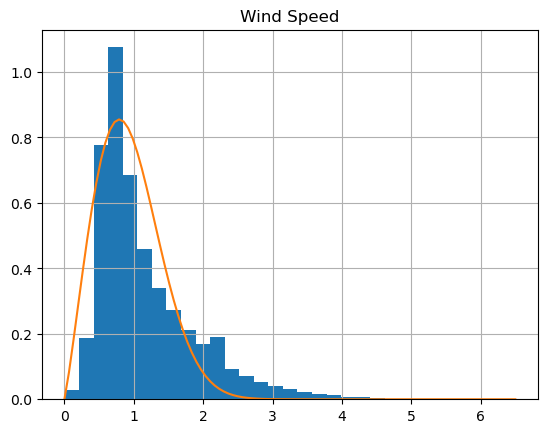

In [84]:
y_hat = weibull_PDF(u_hat,2.15610782, 1.05585435)
ax = df.hist(bins = 30, density = True)
plt.plot(u_hat,y_hat)

Tutorial_Python_Geospatial.ipynb
https://colab.research.google.com/drive/1B7gFBSr0eoZ5IbsA0lY8q3XL8n-3BOn4#scrollTo=wfU1toD9yd23


https://github.com/royalosyin/A-Beginner-Guide-to-Carry-out-Extreme-Value-Analysis-with-Codes-in-Python/blob/master/extremeMultipleDistributions.ipynb
https://pypi.org/project/lmoments/

https://www.stat.berkeley.edu/~paciorek/presentations/paciorek-imsc19.pdf
https://github.com/climate-and-health-datasci-Unicamp/py-climate-health-toolbox/blob/master/examples/IAC_heatwave_analyses.ipynb

https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00093736/detail
